In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Jishanth M I\Downloads\DS1_C5_S3_BazilHousing_Data_Hackathon (1).csv")
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
data.shape

(10692, 13)

In [4]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [24]:
# seprate the categorical and numerical columns 
def separate(data):
    categorical = []
    countinuous = []
    
    for column in data.columns:
        if data[column].nunique() < 40:
            categorical.append(column)
        else:
            countinuous.append(column)
    
    return categorical,countinuous

categorical, countinuous = separate(data)

print("categorical: ",categorical)
print("countinuous: ",countinuous)

categorical:  ['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']
countinuous:  ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


In [38]:
# using loc function we get the detail of categorical columns

categorical=data.loc[:,categorical]
categorical

,city,rooms,bathroom,parking spaces,floor,animal,furniture
0,São Paulo,2,1,1,7,acept,furnished
1,São Paulo,4,4,0,20,acept,not furnished
2,Porto Alegre,1,1,1,6,acept,not furnished
3,Porto Alegre,2,1,0,2,acept,not furnished
4,São Paulo,1,1,0,1,not acept,not furnished
...,...,...,...,...,...,...,...
10687,Porto Alegre,2,1,1,5,not acept,furnished
10688,São Paulo,4,4,4,17,acept,not furnished
10689,Rio de Janeiro,3,3,0,8,not acept,furnished
10690,Rio de Janeiro,2,2,2,8,acept,furnished


In [45]:
# using loc function we get the detail of numarical columns
countinuous=data.loc[:,countinuous]
countinuous

,area,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2065,3300,211,42,5618
1,320,1200,4960,1750,63,7973
2,80,1000,2800,0,41,3841
3,51,270,1112,22,17,1421
4,25,0,800,25,11,836
...,...,...,...,...,...,...
10687,63,402,1478,24,22,1926
10688,285,3100,15000,973,191,19260
10689,70,980,6000,332,78,7390
10690,120,1585,12000,279,155,14020


# Analysis of categorical columns

In [42]:
categorical.columns

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal',
       'furniture'],
      dtype='object')

In [41]:
for i in categorical.columns:
    print('UNIQUE VALUES')
    print(f'{i}   : unique values: {categorical[i].unique()}')
    print('MISSING VALUES')
    print(f'{i}   : missing values: {categorical[i].isnull().sum()}') 
    if categorical[i].isnull().sum()>0:
        categorical[i].fillna(categorical[i].mode[0],inplace=True)
    print('MODE VALUES')
    print(f'{i}   : unique values:  {categorical[i].mode()}') 

UNIQUE VALUES
city   : unique values: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
MISSING VALUES
city   : missing values: 0
MODE VALUES
city   : unique values:  0    São Paulo
Name: city, dtype: object
UNIQUE VALUES
rooms   : unique values: [ 2  4  1  3  7  5  8  6 10 13  9]
MISSING VALUES
rooms   : missing values: 0
MODE VALUES
rooms   : unique values:  0    3
Name: rooms, dtype: int64
UNIQUE VALUES
bathroom   : unique values: [ 1  4  3  2  6  5  7  9  8 10]
MISSING VALUES
bathroom   : missing values: 0
MODE VALUES
bathroom   : unique values:  0    1
Name: bathroom, dtype: int64
UNIQUE VALUES
parking spaces   : unique values: [ 1  0  7  4  2  6  3  8  5 10 12]
MISSING VALUES
parking spaces   : missing values: 0
MODE VALUES
parking spaces   : unique values:  0    1
Name: parking spaces, dtype: int64
UNIQUE VALUES
floor   : unique values: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  4

# 1.Analysis of city

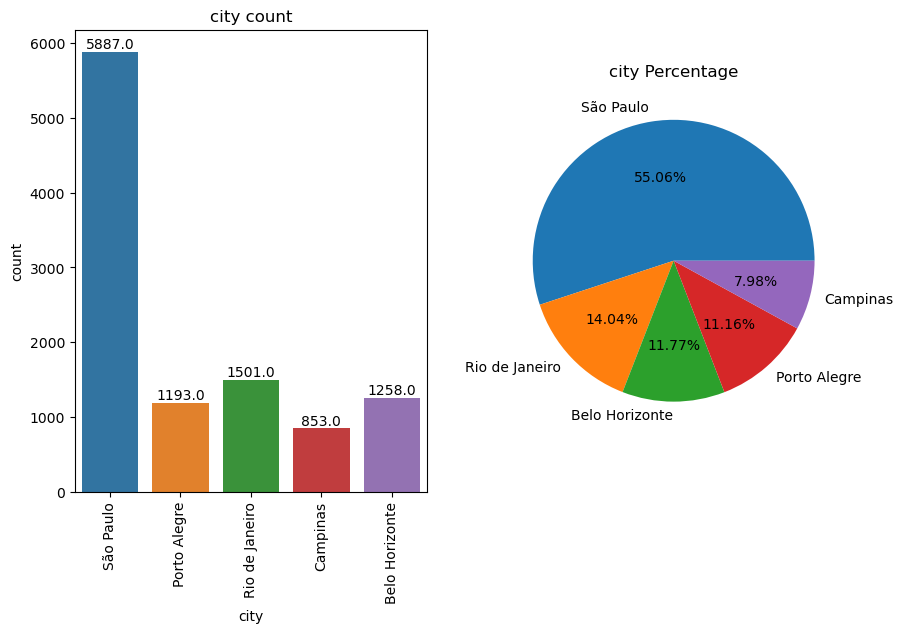

In [8]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
ax=sb.countplot(data=data, x='city')
plt.xticks(rotation=90)
plt.title('city count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['city'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('city Percentage')
plt.show()

# 2.Analysis of rooms

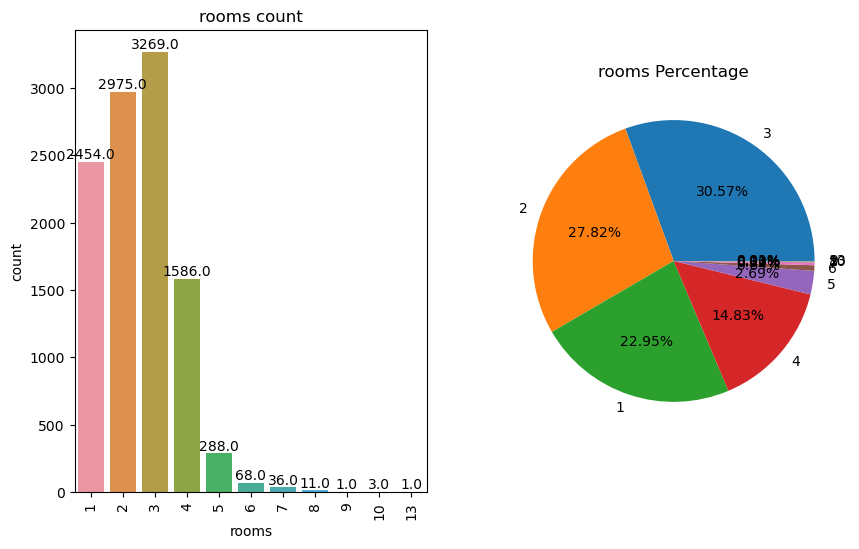

In [9]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='rooms')
plt.xticks(rotation=90)
plt.title('rooms count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['rooms'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('rooms Percentage')
plt.show()



# 3.Analysis of bathroom

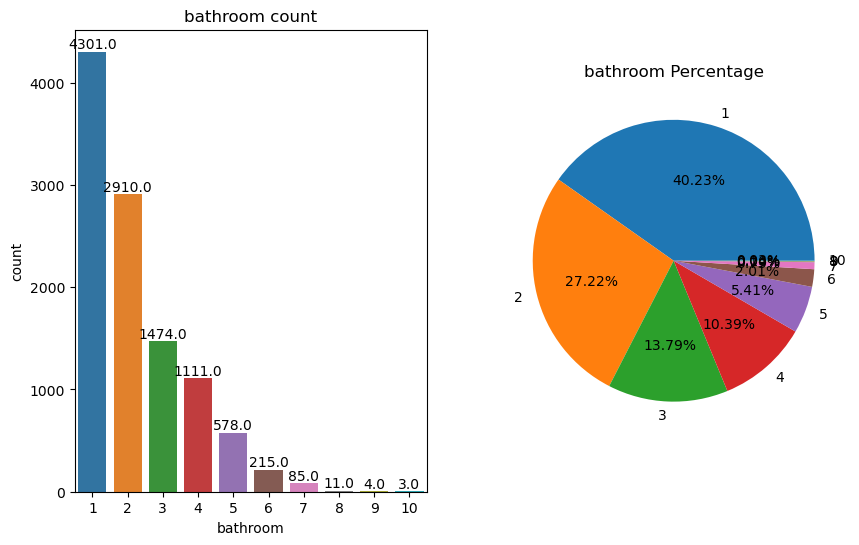

In [10]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='bathroom')
plt.title('bathroom count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['bathroom'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('bathroom Percentage')
plt.show()



# 4.Analysis of parking spaces

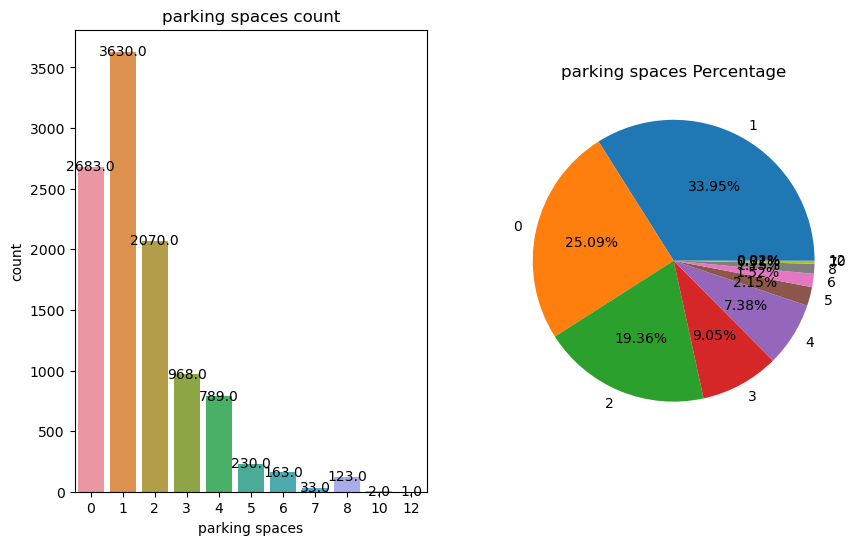

In [11]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='parking spaces')
plt.title('parking spaces count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['parking spaces'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('parking spaces Percentage')
plt.show()

# 5.Analysis of floor

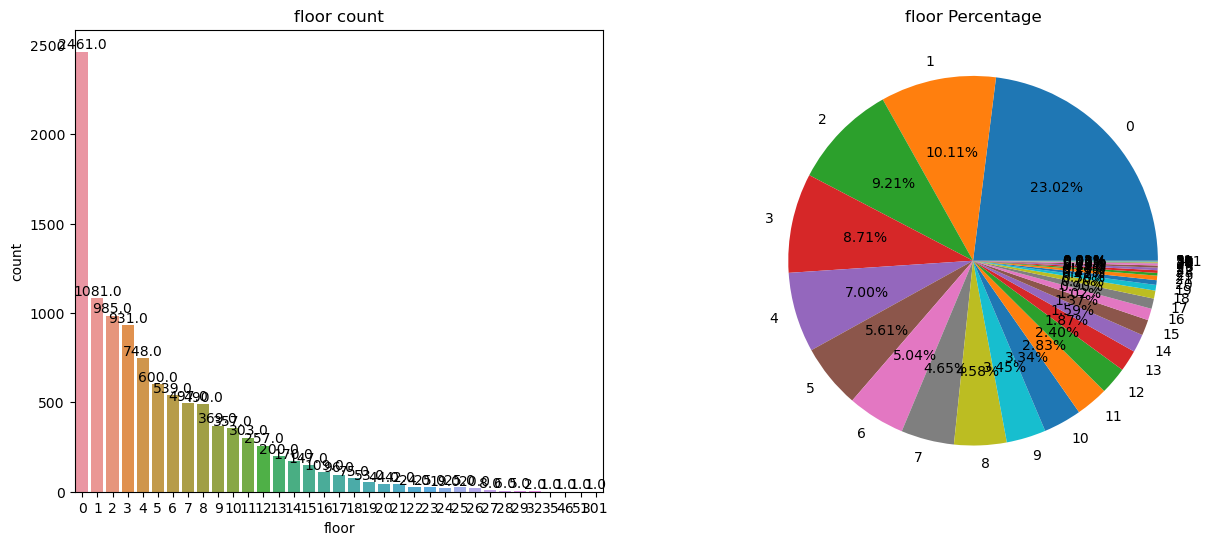

In [12]:
plt.figure(figsize=(15,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='floor')
plt.title('floor count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['floor'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('floor Percentage')
plt.show()

# 6.Analysis of animal

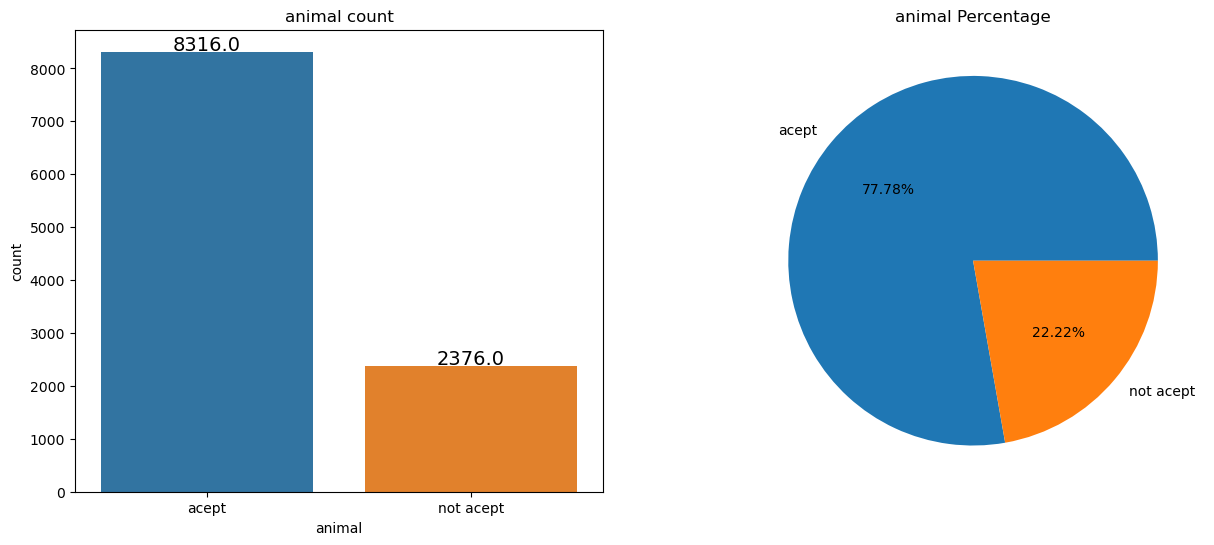

In [13]:
plt.figure(figsize=(15,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='animal')
plt.title('animal count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')


# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['animal'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('animal Percentage')
plt.show()

# 7.Analysis of furniture

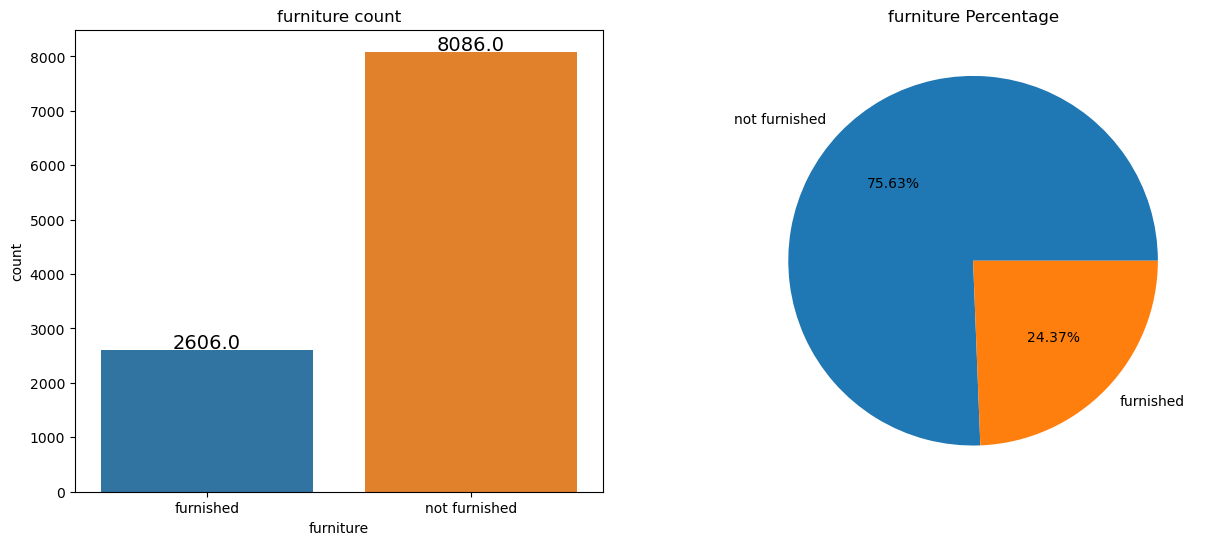

In [14]:
plt.figure(figsize=(15,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='furniture')
plt.title('furniture count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=14, color='black', xytext=(0, 5), textcoords='offset points')


# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['furniture'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('furniture Percentage')
plt.show()

# Analysis of numarical columns

In [46]:
countinuous.columns

Index(['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [47]:
for i in countinuous.columns:
    print('UNIQUE VALUES')
    print(f'{i}   : unique values: {countinuous[i].unique()}')
    print('MISSING VALUES')
    print(f'{i}   : missing values: {countinuous[i].isnull().sum()}') 
    if countinuous[i].isnull().sum()>0:
        countinuous[i].fillna(countinuous[i].mode[0],inplace=True)
    print('MODE VALUES')
    print(f'{i}   : unique values:  {countinuous[i].mode()}') 

UNIQUE VALUES
area   : unique values: [   70   320    80    51    25   376    72   213   152    35    26    46
    36    55   100   330   110    88    56   600    42   160    90    49
    41    64   208    20    32    45   350    38    30    40   300   240
   200   360   250    48   150    60    31   210   280    93    75   194
    65   278    61   130   164   220   108   128    47   170    68    63
   145    85   254   296   133    44    22    50    67   109   400   284
   309    73   155    58    94    76   192   217    95   900    34    62
   180   140    52   999   270    71   500    96   660   107   105   287
    24   154   101   384    57    39    78    28    83   750   258   123
   127   219   420    59   225   480    53   121    43   570    89   173
    91   530    87   136   308   260   120    33   131   161   720   236
    81   125    37   230   450   234   135   395    92   412   190   165
   380    19   124   115   700    15   204   540    23   178   114   113
    69   306 

# Analysis of area

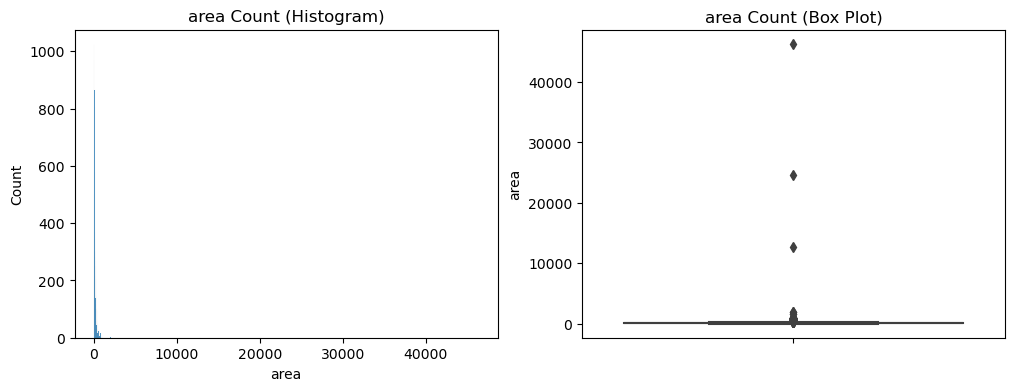

In [72]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=data, x='area')
plt.title('area Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=data, y='area')
plt.title('area Count (Box Plot)')
plt.show()

In [67]:
mean= countinuous['area'].mean()
s=countinuous[countinuous['area']>500].index
for index in s:
    countinuous.loc[index,'area']=mean

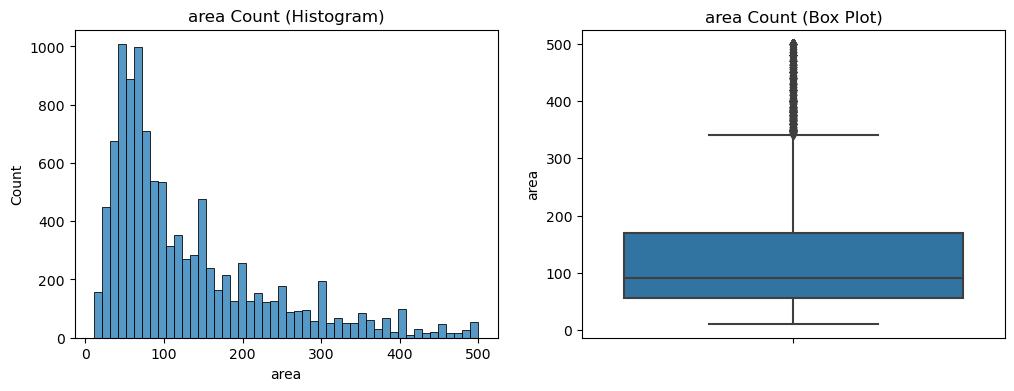

In [73]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='area')
plt.title('area Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='area')
plt.title('area Count (Box Plot)')
plt.show()

# Analysis of hoa (R$)

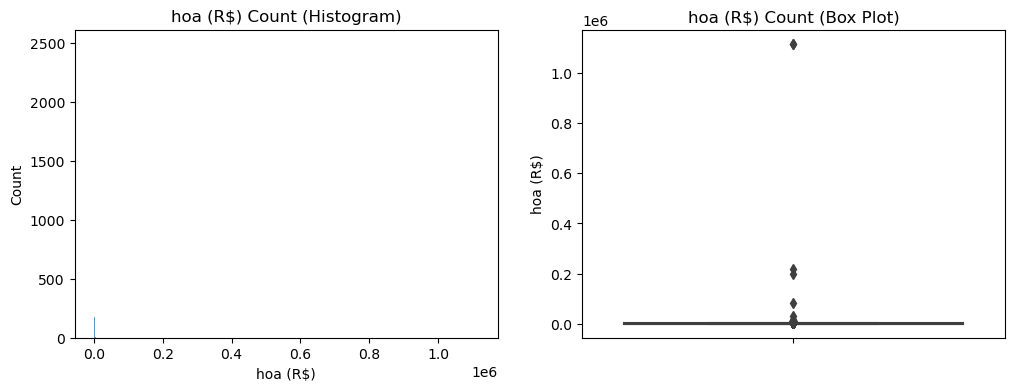

In [77]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='hoa (R$)')
plt.title('hoa (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='hoa (R$)')
plt.title('hoa (R$) Count (Box Plot)')
plt.show()

In [78]:
mean= countinuous['hoa (R$)'].mean()
s=countinuous[countinuous['hoa (R$)']>500].index
for index in s:
    countinuous.loc[index,'hoa (R$)']=mean

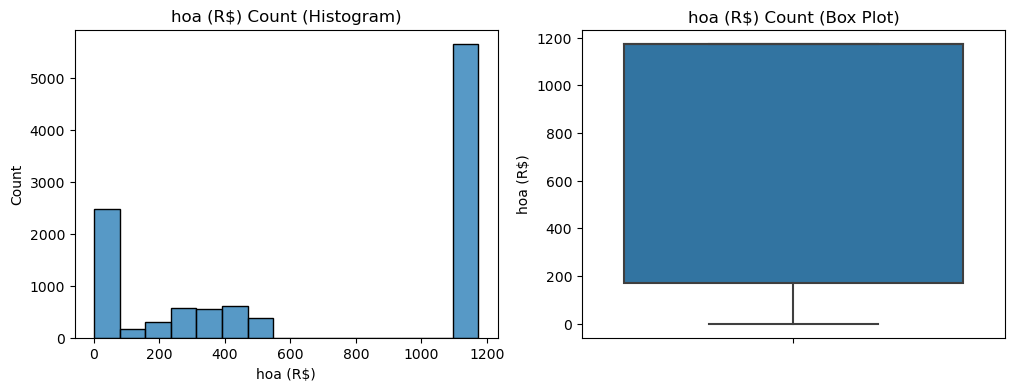

In [79]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='hoa (R$)')
plt.title('hoa (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='hoa (R$)')
plt.title('hoa (R$) Count (Box Plot)')
plt.show()

# Analysis of rent amount (R$)

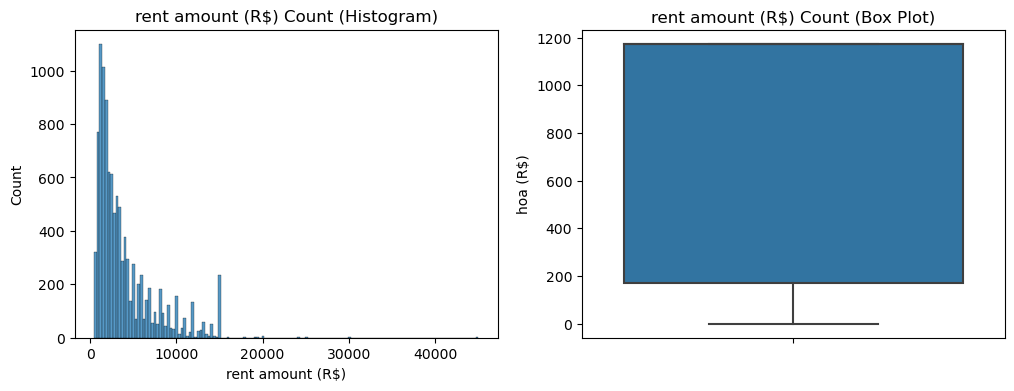

In [80]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='rent amount (R$)')
plt.title('rent amount (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='hoa (R$)')
plt.title('rent amount (R$) Count (Box Plot)')
plt.show()

In [85]:
mean= countinuous['hoa (R$)'].mean()
s=countinuous[countinuous['hoa (R$)']>10000].index
for index in s:
    countinuous.loc[index,'hoa (R$)']=mean

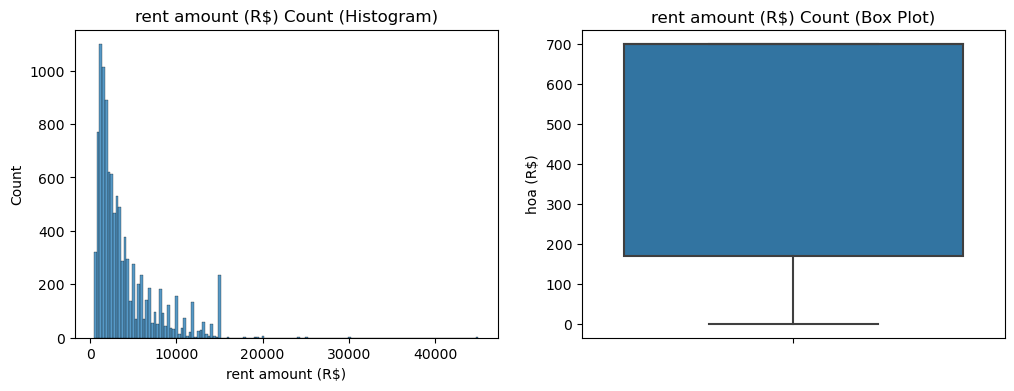

In [86]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='rent amount (R$)')
plt.title('rent amount (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='hoa (R$)')
plt.title('rent amount (R$) Count (Box Plot)')
plt.show()

# Analysis of PROPERTY TAX

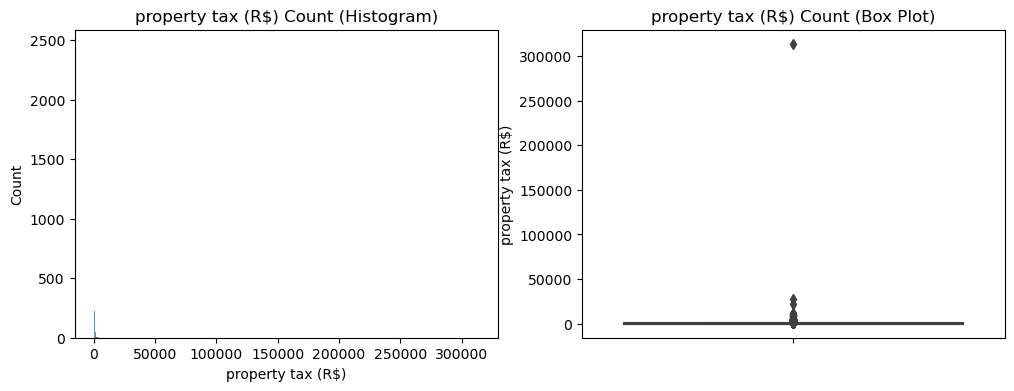

In [90]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='property tax (R$)')
plt.title('property tax (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='property tax (R$)')
plt.title('property tax (R$) Count (Box Plot)')
plt.show()

In [91]:
mean= countinuous['property tax (R$)'].mean()
s=countinuous[countinuous['property tax (R$)']>2000].index
for index in s:
    countinuous.loc[index,'property tax (R$)']=mean

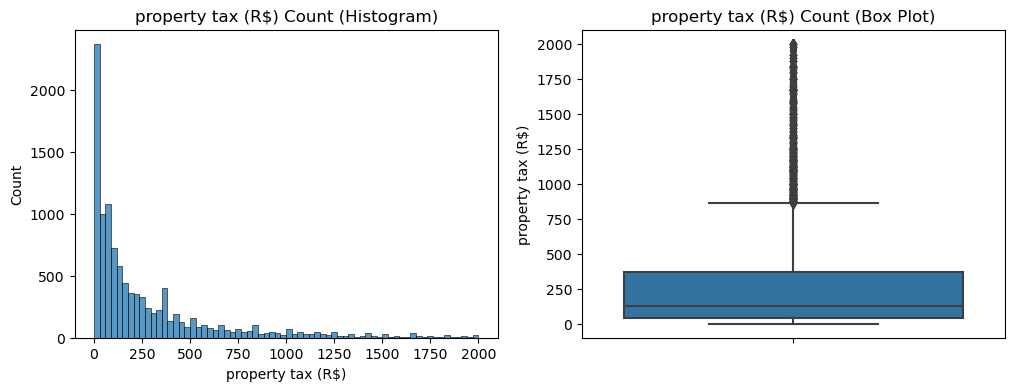

In [92]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='property tax (R$)')
plt.title('property tax (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='property tax (R$)')
plt.title('property tax (R$) Count (Box Plot)')
plt.show()

# Analysis of fire insurance (R$)

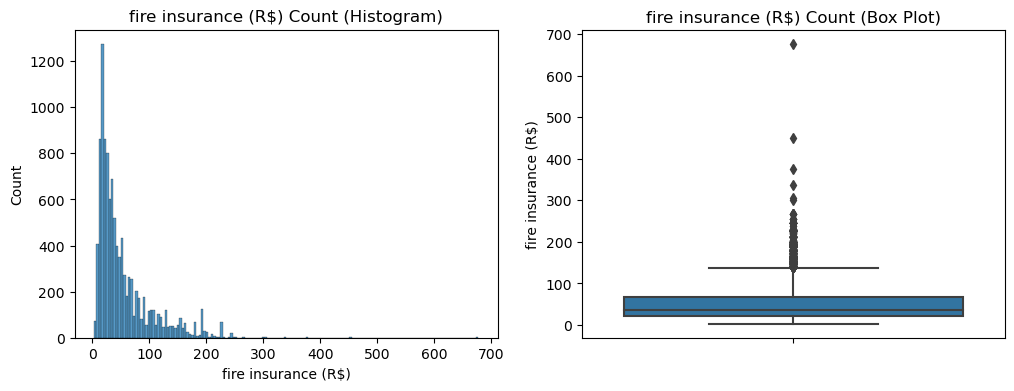

In [93]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='fire insurance (R$)')
plt.title('fire insurance (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='fire insurance (R$)')
plt.title('fire insurance (R$) Count (Box Plot)')
plt.show()

In [95]:
mean= countinuous['property tax (R$)'].mean()
s=countinuous[countinuous['property tax (R$)']>300].index
for index in s:
    countinuous.loc[index,'property tax (R$)']=mean

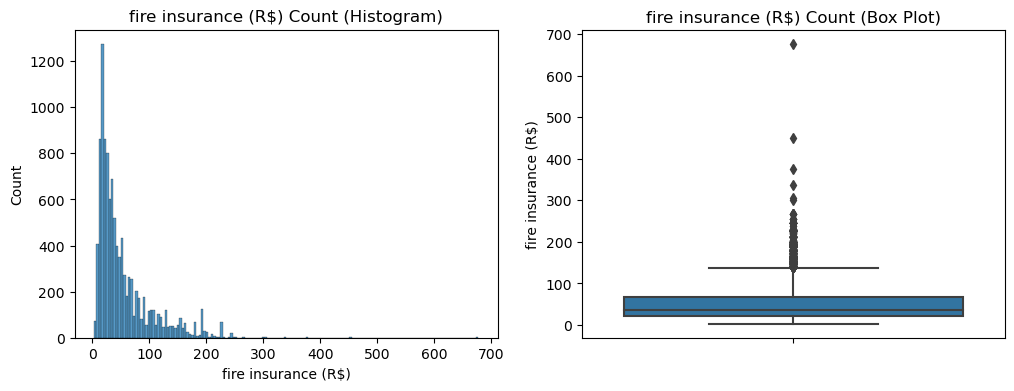

In [96]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='fire insurance (R$)')
plt.title('fire insurance (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='fire insurance (R$)')
plt.title('fire insurance (R$) Count (Box Plot)')
plt.show()

# Analysis of total (R$)

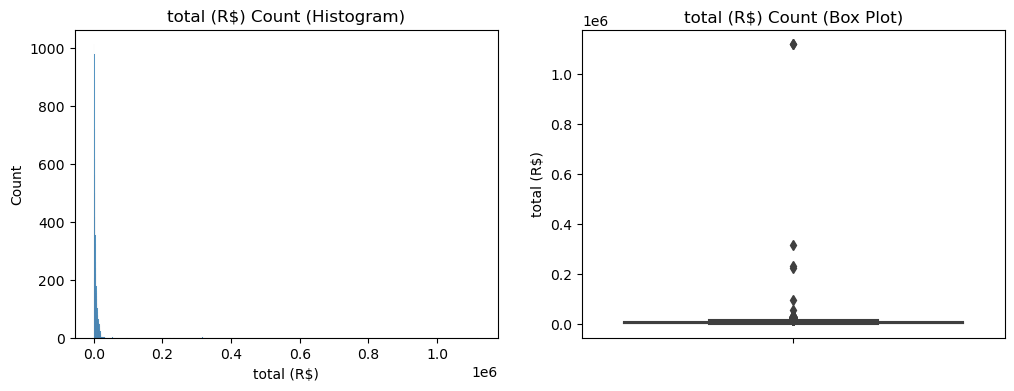

In [100]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='total (R$)')
plt.title('total (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='total (R$)')
plt.title('total (R$) Count (Box Plot)')
plt.show()

In [103]:
mean= countinuous['total (R$)'].mean()
s=countinuous[countinuous['total (R$)']>10500].index
for index in s:
    countinuous.loc[index,'total (R$)']=mean

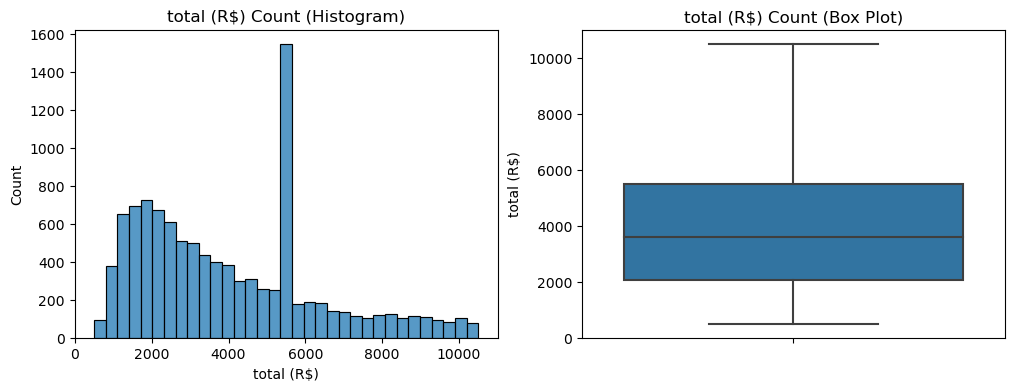

In [104]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='total (R$)')
plt.title('total (R$) Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='total (R$)')
plt.title('total (R$) Count (Box Plot)')
plt.show()

# ANALYSIS 2  BIVARIATE ANALYSIS

In [105]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   rooms           10692 non-null  int64 
 2   bathroom        10692 non-null  int64 
 3   parking spaces  10692 non-null  int64 
 4   floor           10692 non-null  int64 
 5   animal          10692 non-null  object
 6   furniture       10692 non-null  object
dtypes: int64(4), object(3)
memory usage: 584.8+ KB


# CITY VS ROOMS AND BATHROOMS

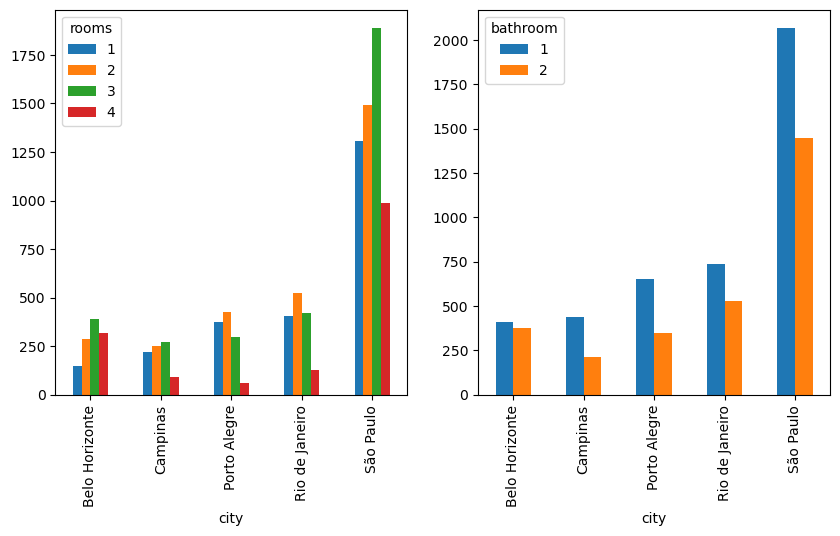

In [117]:
r=data[data['rooms']<=4]
b=data[data['bathroom']<=2]
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=r['city'],columns=r['rooms']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=b['city'],columns=b['bathroom']).plot(kind='bar',ax=ax[1])
plt.show()

# CITY VS PARKING SPACES AND FLOOR

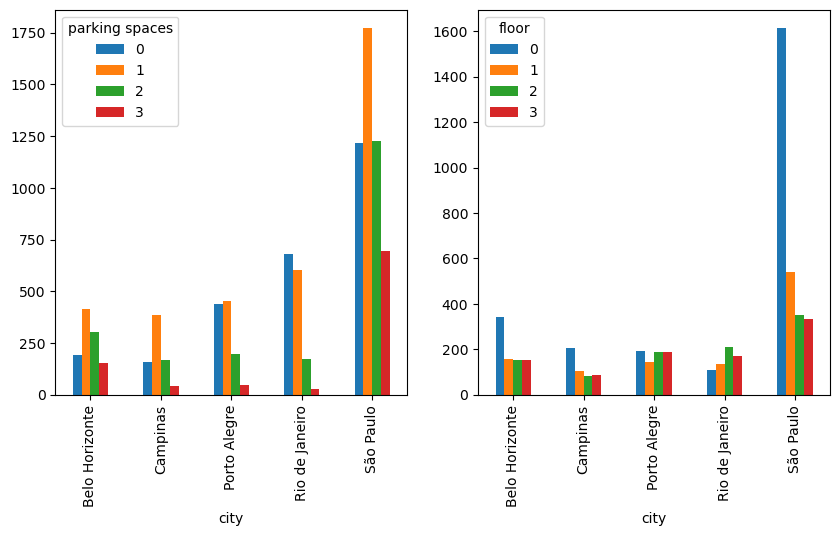

In [119]:
p=data[data['parking spaces']<=3]
f=data[data['floor']<=3]
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=p['city'],columns=p['parking spaces']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=f['city'],columns=f['floor']).plot(kind='bar',ax=ax[1])
plt.show()

# FURNITURE VS ROOMS AND FLOOR

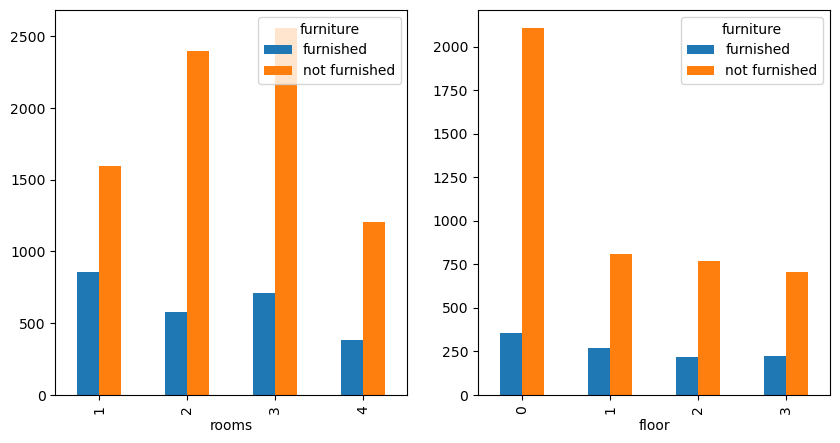

In [120]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=r['rooms'],columns=r['furniture']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=f['floor'],columns=f['furniture']).plot(kind='bar',ax=ax[1])
plt.show()

# CITY VS ANIMAL AND CITY

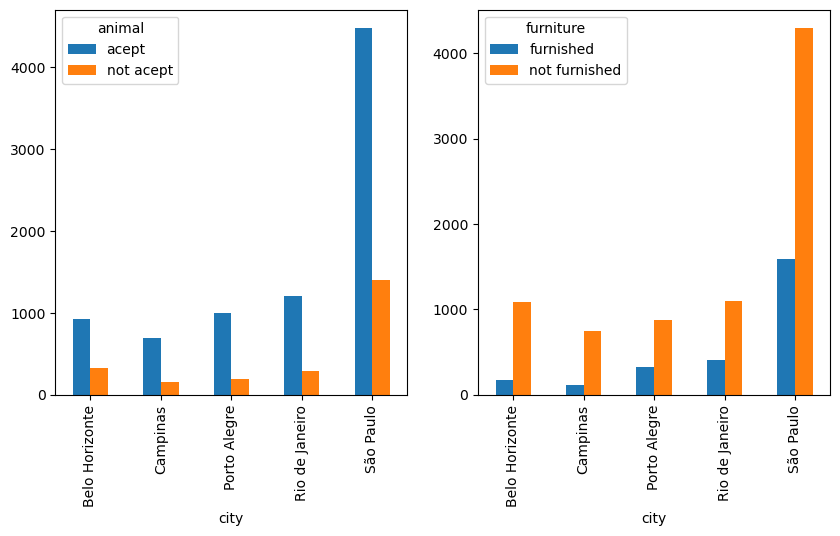

In [122]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['city'],columns=data['animal']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['city'],columns=data['furniture']).plot(kind='bar',ax=ax[1])
plt.show()

# PARKING VS FURNISHED , ANIMAL VS BATHROOM

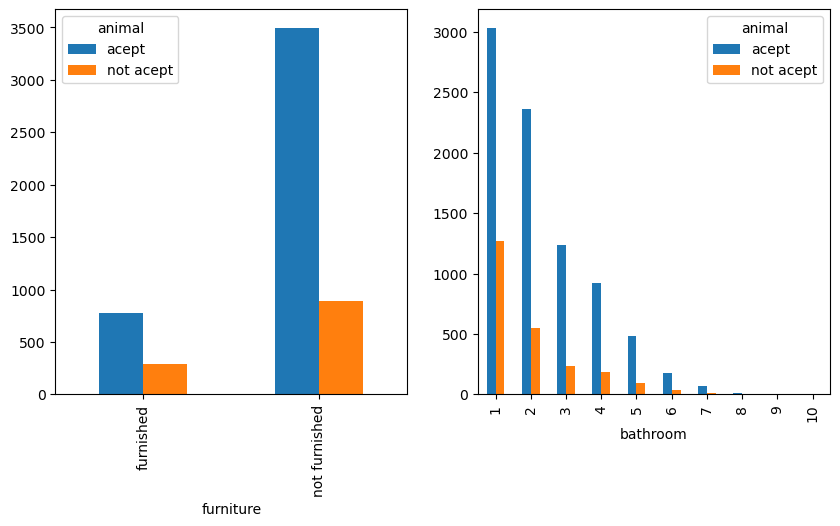

In [124]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=f['furniture'],columns=f['animal']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=data['bathroom'],columns=data['animal']).plot(kind='bar',ax=ax[1])
plt.show()

# PARKING SPACE VS FLOOR AND FURNISHED

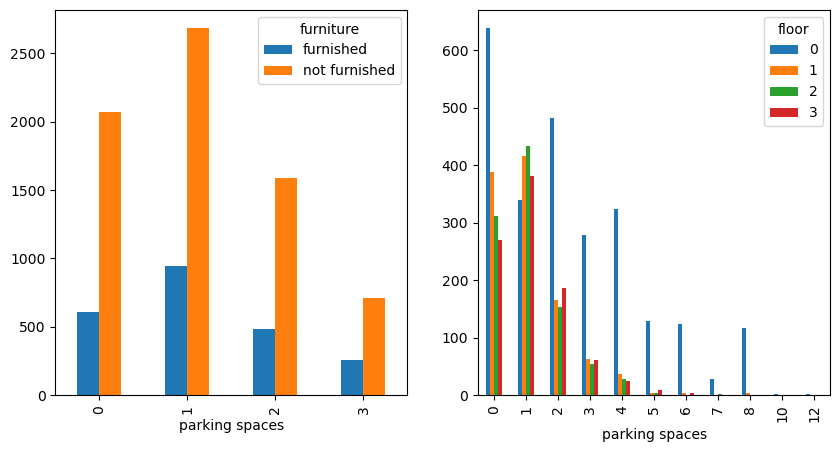

In [125]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=p['parking spaces'],columns=p['furniture']).plot(kind='bar',ax=ax[0])
pd.crosstab(index=f['parking spaces'],columns=f['floor']).plot(kind='bar',ax=ax[1])
plt.show()

# FIRE INSURANCE VS RENT , HOA VS TOTAL

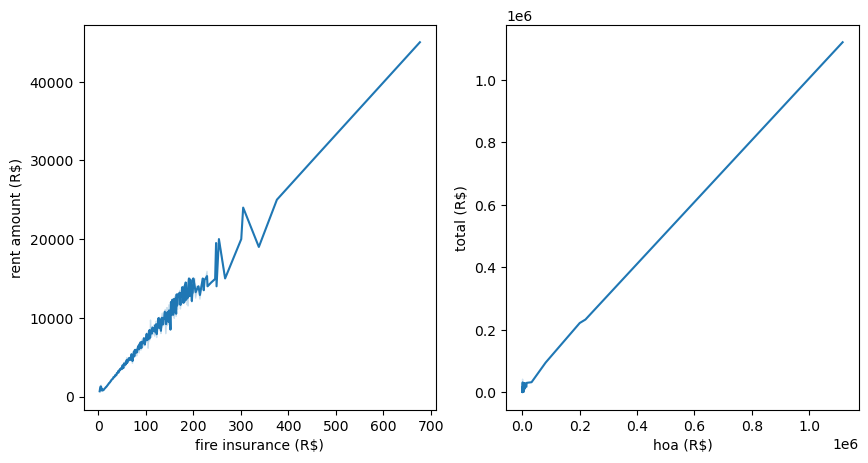

In [127]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.lineplot(x=data['fire insurance (R$)'],y=data['rent amount (R$)'],ax=ax[0])
sb.lineplot(x=data['hoa (R$)'],y=data['total (R$)'],ax=ax[1])
plt.show()

# CITY VS TOTAL RENT

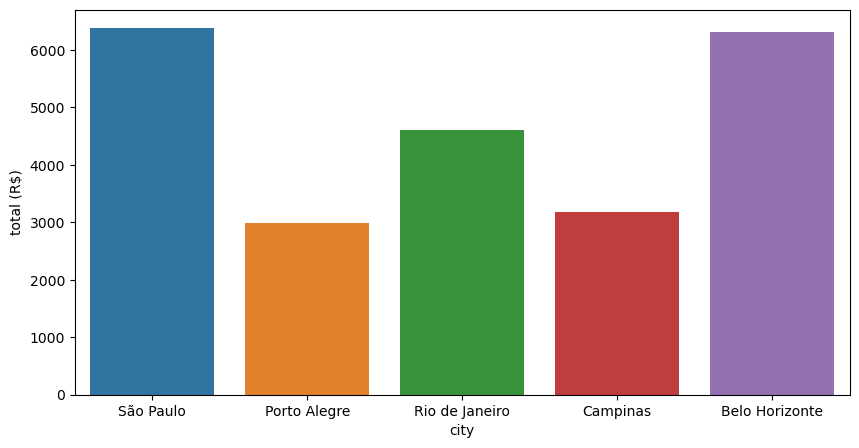

In [129]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=data['city'],y=data['total (R$)'],ci=False)
plt.show()

# ANALYSIS 3  MULTI VARIATE

# CITY VS TOTAL WITH ANIMALS

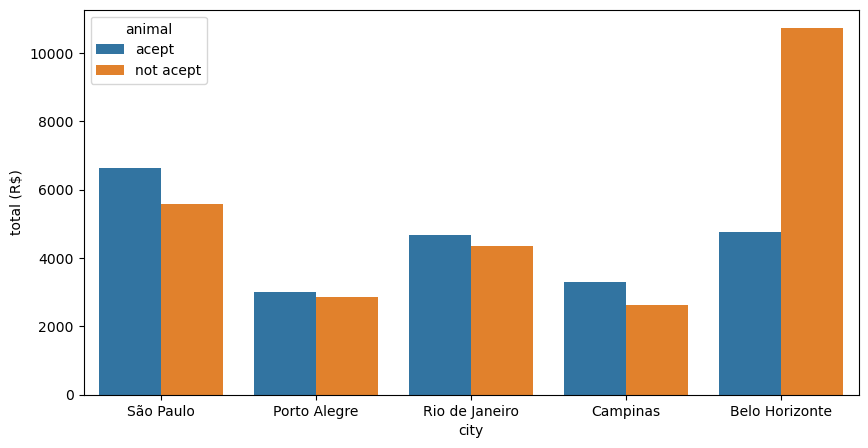

In [130]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=data['city'],y=data['total (R$)'],hue=data['animal'],ci=False)
plt.show()

# CITY VS FLOOR WITH ANIMAL

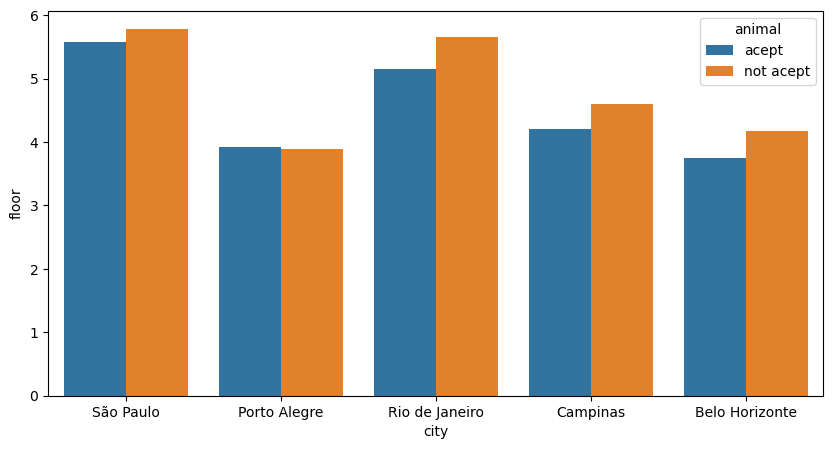

In [131]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=data['city'],y=data['floor'],hue=data['animal'],ci=False)
plt.show()

# CITY VS ROOMS WITH ANIMAL

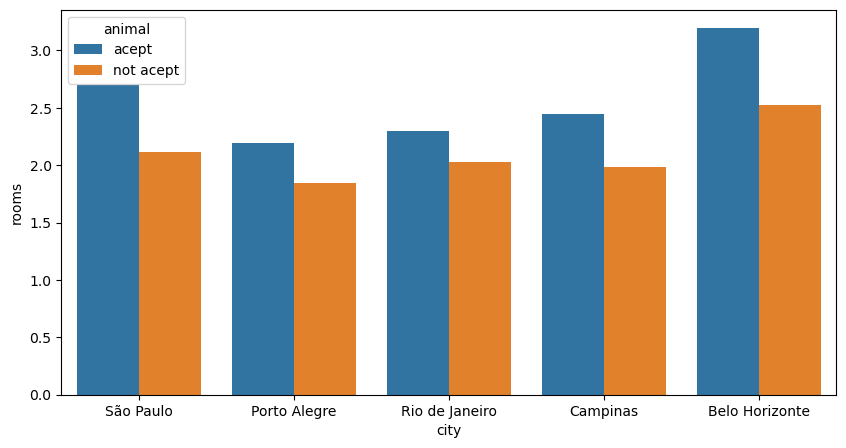

In [132]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=data['city'],y=data['rooms'],hue=data['animal'],ci=False)
plt.show()

# CITY VS RENT AMOUNT WITH ANIMAL

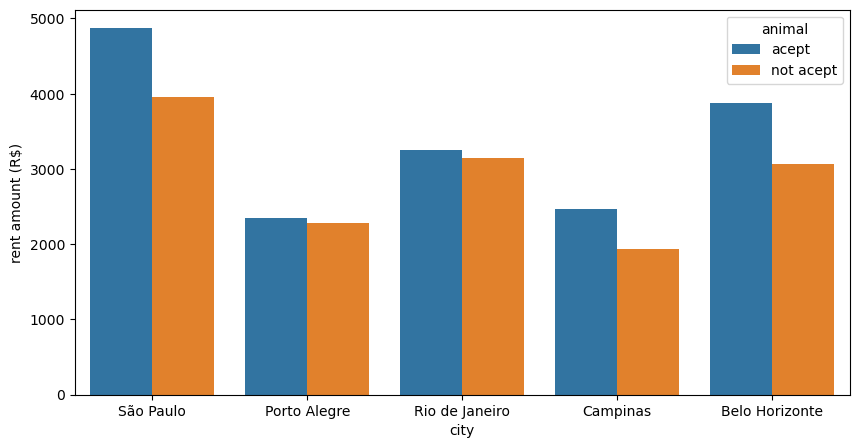

In [135]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=data['city'],y=data['rent amount (R$)'],hue=data['animal'],ci=False)
plt.show()

# CITY VS FIRE INSURANCE WITH ANIMAL

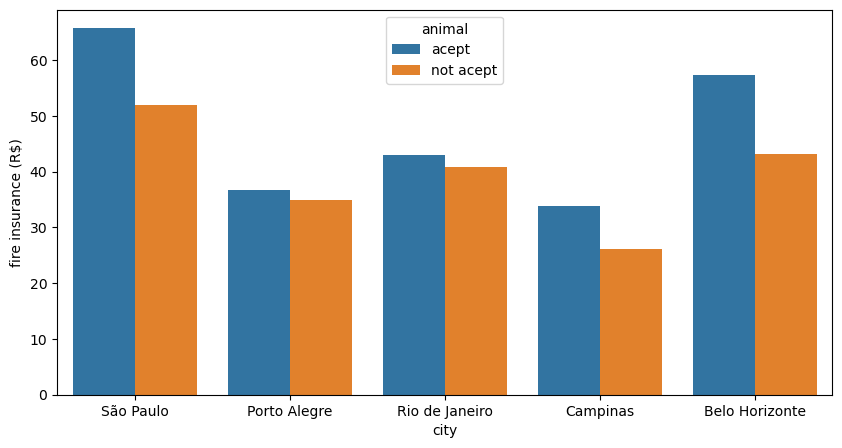

In [136]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=data['city'],y=data['fire insurance (R$)'],hue=data['animal'],ci=False)
plt.show()

# ROOMS VS PARKING SPACE WITH FURNISHED

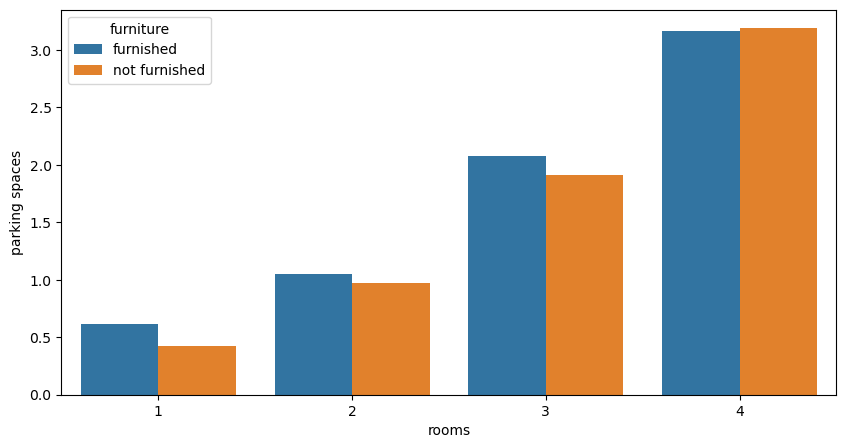

In [137]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=r,x=r['rooms'],y=r['parking spaces'],hue=r['furniture'],ci=False)
plt.show()

# ROOMS VS RENT AMOUNT WITH ANIMAL

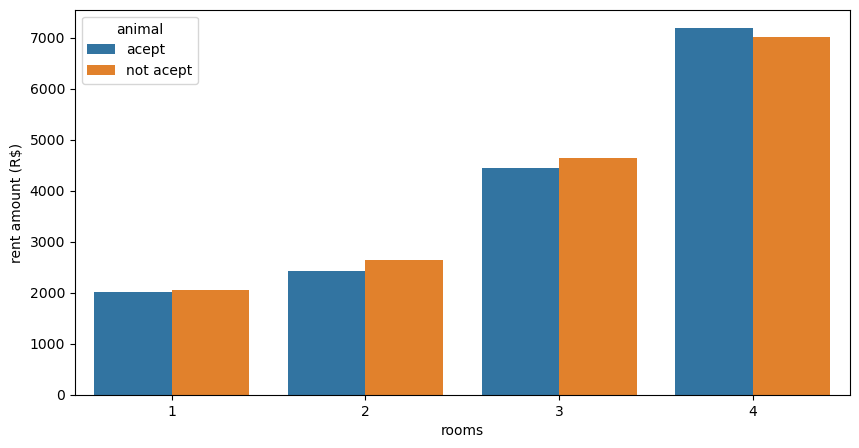

In [138]:
fig,ax=plt.subplots(1,figsize=(10,5))
sb.barplot(data=data,x=r['rooms'],y=r['rent amount (R$)'],hue=r['animal'],ci=False)
plt.show()

# RENT AMOUNT VS ROOMS AND CITY WITH FURNITURED

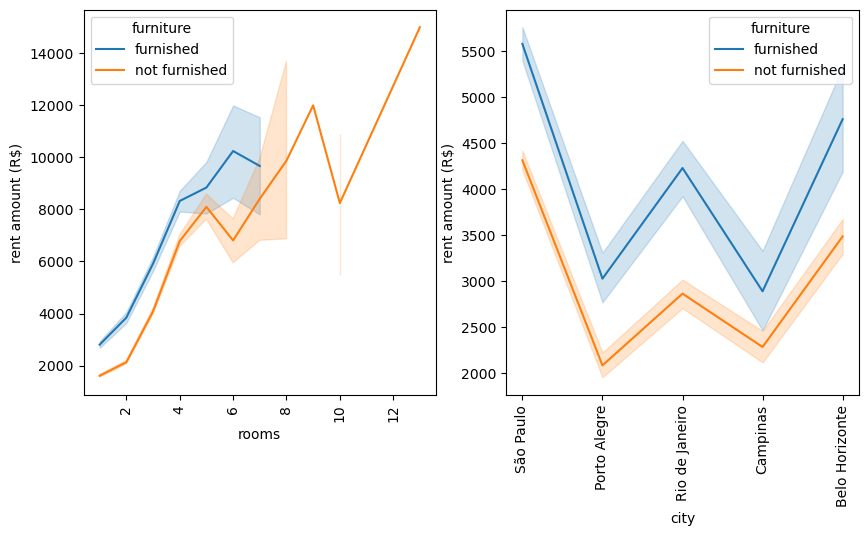

In [139]:
gig,ax=plt.subplots(1,2,figsize=(10,5))
sb.lineplot(x=data['rooms'],y=data['rent amount (R$)'],hue=data['furniture'],ax=ax[0])
sb.lineplot(x=data['city'],y=data['rent amount (R$)'],hue=data['furniture'],ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
plt.show()

# PARKING SPACE VS RENT WITH FURNITURE , CITY VS TOTAL WITH FURNITURE

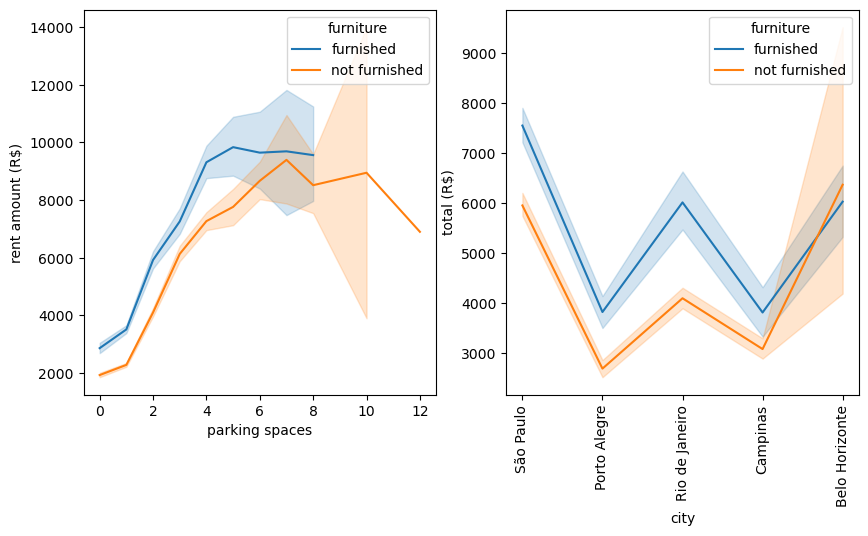

In [140]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.lineplot(x=data['parking spaces'],y=data['rent amount (R$)'],hue=data['furniture'],ax=ax[0])
sb.lineplot(x=data['city'],y=data['total (R$)'],hue=data['furniture'],ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)
plt.show()

# CITY VS RENT WITH ANIMAL TOTAL VS PROPERTY TAX WITH FURNITURE

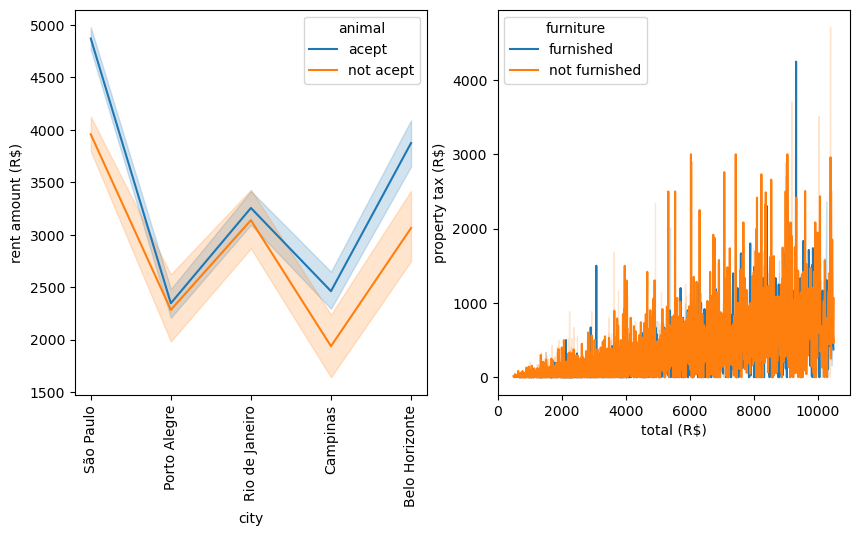

In [141]:
w=data[data['total (R$)']<=10500]
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.lineplot(x=data['city'],y=data['rent amount (R$)'],hue=data['animal'],ax=ax[0])
sb.lineplot(x=w['total (R$)'],y=w['property tax (R$)'],hue=w['furniture'],ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)
plt.show()

# Recomendations:

In [ ]:
1.The Total Cost for rent in city campinas is cheaper.

2.If someone looking for furnsied house and that should be cheap is again Porto Alegre.

3.Cities Porto And Campinas almost 50 % accepts pets and are also not expensive.

4. The 50% house having lesser than 3 room set accepts pets.

5. The Two room set are really affordable which are furnished, otherwise the furnished homes are really expensive

6.Sau Paulo city can be considered for having two room set house.

6The Average rent comes out to be near 2000 considering two parking spaces or less because lesser roomset house will be considered.

7. The Total amount increases on increase in parking spaces and if the house if furmised the cast become more higher

8.Sao Paulo can be considered if rent is not a issue.

9. The Average amount of 1 and 2 room set is not so significantly different and hence one should consider buying 2 room set if he is looking for the small house. 

10. The Average price for renting a room of 3 rooms and lesser, the total rent would be around 2000-3000 obviosly depending on the number of rooms you are considering. 

11. The Parking Space is higher when no of rooms increases on increase of rooms and thats true conisdering a bigger family would have more cars and need more parking spaces.

12.Again theres not much difference in price for 0 and 1 parking space and one should go for at least 1 parking space house in case in future he may require that.

13.If Someone is looking for the one parking space or lower and wants less rent so he can opt for Campinas, Belo Horizonate.

14.Cities Porto Alegre and Rio de Janerio can be considered for lesser parking spaces and cheaper rents 

15.The House are cheaper where pets are not allowed and the price diference is also quite significant.

16.Considering 4 room set and higher, the parking space doesnt affect the price because if considering 4 room set, then you are expected to get 2-3 parking spaces at zero extra price.